In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from sklearn import metrics,cross_validation
import tensorflow as tf
from tensorflow.contrib import learn
import scipy.io as sio
import matplotlib.pyplot as plt
import random
import operator
from PIL import Image
from PIL import ImageDraw
import pylab

In [2]:
DATA_FILE= '/home/ankdesh/explore/DeepLearning-UdacityCapston/data/CroppedDigits/train_32x32.mat'

In [3]:
data_file = sio.loadmat(DATA_FILE)

In [4]:
X = data_file['X'][2:30,2:30,:,:]
print(X.shape)
X = X.transpose(3,0,1,2)
print(X.shape)
y = data_file['y'].reshape(-1) - 1
print(y.shape)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=0)
print (X_train.shape, X_test.shape , y_train.shape, y_test.shape)

(28, 28, 3, 73257)
(73257, 28, 28, 3)
(73257,)
(58605, 28, 28, 3) (14652, 28, 28, 3) (58605,) (14652,)


In [14]:
def max_pool_2x2(tensor_in):
  return tf.nn.max_pool(
      tensor_in, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


def conv_model(X, y):
  # reshape X to 4d tensor with 2nd and 3rd dimensions being image width and
  # height final dimension being the number of color channels.
  X = tf.reshape(X, [-1, 28, 28, 3])
  # first conv layer will compute 32 features for each 5x5 patch
  with tf.variable_scope('conv_layer1'):
    h_conv1 = learn.ops.conv2d(X, n_filters=32, filter_shape=[5, 5],
                               bias=True, activation=tf.nn.relu)
    print ("h1_conv1 shape = " ,h_conv1.get_shape())
    h_pool1 = max_pool_2x2(h_conv1)
    print ("h1_pool1 shape = " , h_pool1.get_shape())
  # second conv layer will compute 64 features for each 5x5 patch.
  with tf.variable_scope('conv_layer2'):
    h_conv2 = learn.ops.conv2d(h_pool1, n_filters=64, filter_shape=[5, 5],
                               bias=True, activation=tf.nn.relu)
    print ("h2_conv2 shape = " ,h_conv2.get_shape())
    h_pool2 = max_pool_2x2(h_conv2)
    print ("h1_pool2 shape = " , h_pool2.get_shape())
  with tf.variable_scope('conv_layer3'):
    h_conv3 = learn.ops.conv2d(h_pool2, n_filters=128, filter_shape=[5, 5],
                               bias=True, activation=tf.nn.relu)
    print ("h2_conv3 shape = " ,h_conv3.get_shape())
    h_pool3 = max_pool_2x2(h_conv3)
    print ("h1_pool3 shape = " , h_pool3.get_shape())
  #with tf.variable_scope('conv_layer4'):
  #  h_conv4 = learn.ops.conv2d(h_pool3, n_filters=256, filter_shape=[5, 5],
  #                             bias=True, activation=tf.nn.relu)
  #  h_pool4 = max_pool_2x2(h_conv4)
    # reshape tensor into a batch of vectors
    h_pool3_flat = tf.reshape(h_pool3, [-1, 4 * 4 * 128])
    print ("h1_pool3_flat shape = " , h_pool3_flat.get_shape())
  # densely connected layer with 1024 neurons.
  h_fc1 = learn.ops.dnn(
      h_pool3_flat, [1024], activation=tf.nn.relu, dropout=0.5)
  return learn.models.logistic_regression(h_fc1, y)

In [15]:
classifier = learn.TensorFlowEstimator(
    model_fn=conv_model, n_classes=10, batch_size=32, steps=20000,
    learning_rate=0.001)

In [16]:
classifier.fit(X_train, y_train, logdir='/home/ankdesh/temp/')

h1_conv1 shape =  (?, 28, 28, 32)
h1_pool1 shape =  (?, 14, 14, 32)
h2_conv2 shape =  (?, 14, 14, 64)
h1_pool2 shape =  (?, 7, 7, 64)
h2_conv3 shape =  (?, 7, 7, 128)
h1_pool3 shape =  (?, 4, 4, 128)
h1_pool3_flat shape =  (?, 2048)


TensorFlowEstimator(continue_training=False, optimizer=Adagrad, verbose=1, learning_rate=0.001, batch_size=32, steps=20000, n_classes=10, params=None, clip_gradients=5.0, class_weight=None)

In [17]:
score = metrics.accuracy_score(
    y_test, classifier.predict(X_test))
print('Test Accuracy: {0:f}'.format(score))
score = metrics.accuracy_score(
    y_train, classifier.predict(X_train))
print('Train Accuracy: {0:f}'.format(score))

h1_conv1 shape =  (?, 28, 28, 32)
h1_pool1 shape =  (?, 14, 14, 32)
h2_conv2 shape =  (?, 14, 14, 64)
h1_pool2 shape =  (?, 7, 7, 64)
h2_conv3 shape =  (?, 7, 7, 128)
h1_pool3 shape =  (?, 4, 4, 128)
h1_pool3_flat shape =  (?, 2048)
Test Accuracy: 0.831764
h1_conv1 shape =  (?, 28, 28, 32)
h1_pool1 shape =  (?, 14, 14, 32)
h2_conv2 shape =  (?, 14, 14, 64)
h1_pool2 shape =  (?, 7, 7, 64)
h2_conv3 shape =  (?, 7, 7, 128)
h1_pool3 shape =  (?, 4, 4, 128)
h1_pool3_flat shape =  (?, 2048)
Train Accuracy: 0.848033


In [18]:
prob_test_y = classifier.predict_proba(X_test)
prob_train_y = classifier.predict_proba(X_train)

h1_conv1 shape =  (?, 28, 28, 32)
h1_pool1 shape =  (?, 14, 14, 32)
h2_conv2 shape =  (?, 14, 14, 64)
h1_pool2 shape =  (?, 7, 7, 64)
h2_conv3 shape =  (?, 7, 7, 128)
h1_pool3 shape =  (?, 4, 4, 128)
h1_pool3_flat shape =  (?, 2048)
h1_conv1 shape =  (?, 28, 28, 32)
h1_pool1 shape =  (?, 14, 14, 32)
h2_conv2 shape =  (?, 14, 14, 64)
h1_pool2 shape =  (?, 7, 7, 64)
h2_conv3 shape =  (?, 7, 7, 128)
h1_pool3 shape =  (?, 4, 4, 128)
h1_pool3_flat shape =  (?, 2048)


In [19]:
# Select Test/Train Dataset here
y_vals = prob_test_y
X_vals = X_test

In [20]:
isPredictable = lambda x: any(y_vals[x] > 0.80 )
predictables = [isPredictable(i) for i in range(len(y_vals))]

In [21]:
idxNonPredictable = [i for i,x in enumerate(predictables) if x == False]
idxPredictable = [i for i,x in enumerate(predictables) if x == True]

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

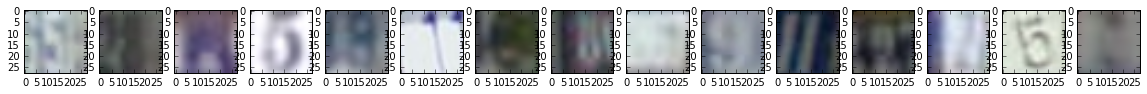

In [23]:
f,ax = plt.subplots(1,15, figsize=(20,20))
for i in range(15):
    ax[i].imshow(X_vals[idxNonPredictable[i]])
plt.show()

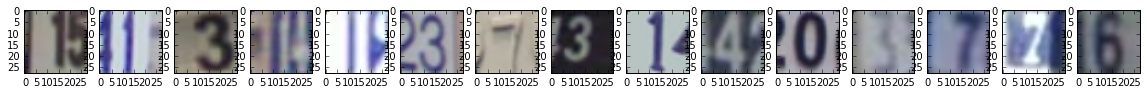

In [24]:
f,ax = plt.subplots(1,15, figsize=(20,20))
for i in range(15):
    ax[i].imshow(X_vals[idxPredictable[i]])
plt.show()